In [1]:
import tarfile
import urllib.request
import os
import os.path

import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


In [2]:
def untar_if_not_exists(src, dest):
    if (not os.path.exists(dest)):
        tar = tarfile.open(src)
        tar.extractall()
        tar.close()
        
def count_files(dir):
    count = 0
    for file in os.listdir(dir):
        path=dir+"/"+file
        if (os.path.isdir(path)):
            count += count_files(path)
        else:
            count += 1
    return count

untar_if_not_exists("data/annotations.tar", "Annotation")
untar_if_not_exists("data/images.tar", "Images")

print("Annotations: " + str(count_files("Annotation")))


print("Images: " + str(count_files("Images")))

Annotations: 20580
Images: 20580


In [3]:
#iria usar from sklearn.model_selection import train_test_split
#mas há parâmetros no próprio keras para separar os dados de treinamento dos dados de validação

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_images = datagen.flow_from_directory(
    "Images", 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode="categorical", 
    subset='training')

validation_images = datagen.flow_from_directory(
    "Images", 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode="categorical", 
    subset='validation')

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


In [4]:
for data_batch, labels_batch in train_images:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 120)


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(120, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv

In [6]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='categorical_crossentropy', metrics=['acc'])

In [7]:
history = model.fit_generator(train_images,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_images,
    validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
100/100 [==============================] - 39s 393ms/step - loss: 4.7856 - acc: 0.0115 - val_loss: 4.7805 - val_acc: 0.0130
Epoch 2/10
100/100 [==============================] - 38s 383ms/step - loss: 4.7841 - acc: 0.0110 - val_loss: 4.7795 - val_acc: 0.0150
Epoch 3/10
100/100 [==============================] - 38s 383ms/step - loss: 4.7799 - acc: 0.0160 - val_loss: 4.7621 - val_acc: 0.0190
Epoch 4/10
100/100 [==============================] - 39s 386ms/step - loss: 4.7548 - acc: 0.0175 - val_loss: 4.7299 - val_acc: 0.0170
Epoch 5/10
100/100 [==============================] - 39s 385ms/step - loss: 4.7020 - acc: 0.0265 - val_loss: 4.6675 - val_acc: 0.0262
Epoch 6/10
100/100 [==============================] - 39s 387ms/step - loss: 4.6372 - acc: 0.0245 - val_loss: 4.5585 - val_acc: 0.0360
Epoch 7/10
100/100 [==============================] - 39s 385ms/step - loss: 4.5659 - acc: 0.0360 - val_loss: 4.5591 - val_acc: 0.0280
Epoch 8

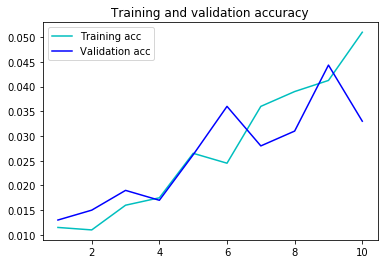

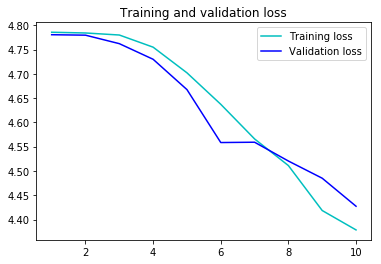

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'c', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'c', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()